# CapsNet implementation - The Simpsons characters

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Download & prepare the Dataset

The dataset used is **The Simpsons Characters Data** which is used for classification of the infamous TV show characters.

Source : https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

Summary :
- 21k images
- 42 classes (imbalanced)

In [2]:
# Download using Kaggle-CL
# !pip install kaggle
# !kaggle datasets download alexattia/the-simpsons-characters-dataset

100%|██████████████████████████████████████| 1.08G/1.08G [11:11<00:00, 1.89MB/s]
100%|██████████████████████████████████████| 1.08G/1.08G [11:11<00:00, 1.72MB/s]


#### Get labels from folder structure

- 80% for training, 20% for validation
- 64 batch size

In [21]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "the-simpsons-characters-dataset/simpsons_dataset",
    validation_split = 0.2,
    subset = "training",
    image_size = (224, 224),
    seed = 123,
    batch_size = 64)

Found 20933 files belonging to 42 classes.
Using 16747 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "the-simpsons-characters-dataset/simpsons_dataset",
    validation_split = 0.2,
    subset = "validation",
    image_size = (224, 224),
    seed = 123,
    batch_size = 64)

Found 20933 files belonging to 42 classes.
Using 4186 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers']


#### Visualization

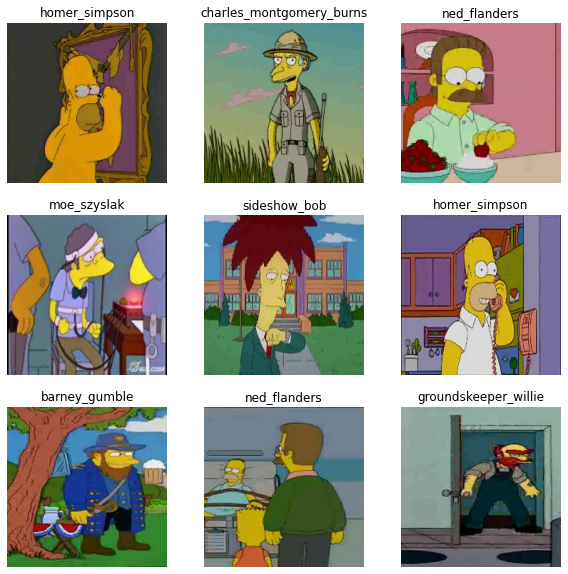

In [26]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")